# Assignment - Simon's Algorithm

The places where you have enter code are marked with `# YOUR CODE HERE`.

In [1]:
!pip install qiskit[visualization]==1.0.2

!pip install qiskit_aer
# ! pip install qiskit-ibmq-provider
# ! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2090915113ff7ada277ff44d70d5c6854db1fbd1977c51e83a9eabdb0ff6e755
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.7 MB/s eta 0:00:00


In [2]:
from qiskit import *
# from qiskit.tools.monitor import job_monitor
# from qiskit.tools.visualization import plot_state_qsphere
# from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

### Question 1 (3 points)

Complete the function `initialize_simon` that creates a quantum circuit consisting of two quantum registers and a classical register for solving Simon's problem.

The function `initialize_simon` has

- Input: $n$ such that you are given a function $f:\{0,1\}^n \rightarrow \{0,1\}$
- Returns: A `QuantumCircuit` object with two quantum registers and a classical register with the correct number of qubits and bits respectively.

In [3]:
from qiskit import QuantumRegister, ClassicalRegister

def initialize_simon(n):
    # Do not modify anything above this line
    # YOUR CODE HERE

    qr1 = QuantumRegister(n, 'qr1')
    qr2 = QuantumRegister(n, 'qr2')
    cr = ClassicalRegister(n, 'cr')

    qc = QuantumCircuit(qr1, qr2, cr)

    for i in range(n):
        qc.h(qr1[i])

    def oracle_f(qc, qr1, qr2):
        for i in range(n):
            qc.cx(qr1[i], qr2[i])

    oracle_f(qc, qr1, qr2)


    # Do not modify anything below this line
    return qc

You can use the following cell to test your function.

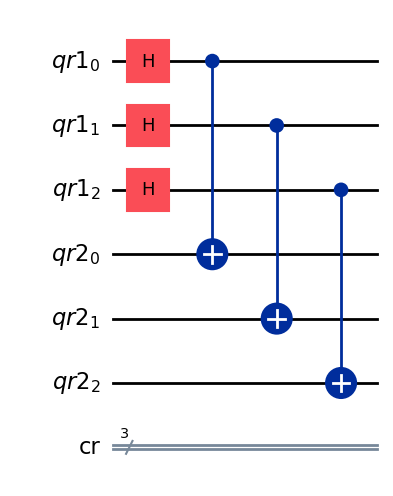

In [4]:
qc = initialize_simon(3)
qc.draw(output='mpl')

### Question 2 (4 points)

Function `simon(n)` returns a single bitstring of length $n$, as a result of running Simon's algorithm. Complete the function `get_y_list` that calls the function `simon()` until $n-1$ bitstrings are found other than the 0 string.

The function `get_y_list` has

- Input: $n$
- Returns: A `list` of bitstrings `y`.

In [10]:
from qiskit import QuantumRegister, ClassicalRegister

def get_y_list(n):
    y_list = []
    # Do not modify anything above this line
    # YOUR CODE HERE

    while(len(y_list)) < n-1:
        y = simon(n)
        if y!='0'*n and y not in y_list:
            y_list.append(y)


    # Do not modify anything below this line
    return y_list

You can use the following cell to test your function.

In [12]:
# A very limited definition of Simon's function, only to help you test.
# The fully formed Simon's function would be more complicated.
def simon(n):
    import itertools as it
    import random
    x = "11"+"0"*(n-2) #s is the string consisting of all 1's therefore x.s=0 always as there are two 1's in x
    return random.choice([''.join(i) for i in it.permutations(x, n)]+["0"*n])

print(get_y_list(5))

['01001', '00011', '00101', '11000']


### Question 3 (3 points)

Complete the function `oracle` which implements the following function: $f(00)=10$, $f(01)=10$, $f(10)=01$, $f(11)=01$  i.e. when the input is 00, you need to obtain '10' as the measurement outcome of the output register. Input will be encoded in the input register, while the output should be encoded in the output register.  

The function `oracle` has

- Inputs: A `QuantumRegister` object `input_reg` consisting of 2 qubits,  A `QuantumRegister` object `output_reg` consisting of 2 qubits and a `QuantumCircuit` object `qc`  
- Returns: `QuantumCircuit` object `qc`  

Note: Don't forget the Qiskit order.

In [19]:
from qiskit import QuantumRegister, ClassicalRegister

def oracle(input_reg,output_reg,qc):
    # Do not modify anything above this line
    # YOUR CODE HERE
    qc.x(output_reg[1])  # Initialize output register to 10
    qc.cx(input_reg[1], output_reg[1])  # f(00) = 10, f(10) = 01
    qc.cx(input_reg[1], output_reg[0])  # f(01) = 10, f(11) = 01

    return qc

You can use the following cell to test your function. Inputs and the outputs should match the function given above.

In [20]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

def test(input_state):
    input_reg = QuantumRegister(2)
    output_reg = QuantumRegister(2)
    creg = ClassicalRegister(2)
    qc = QuantumCircuit(input_reg, output_reg, creg)

    #initialization
    if input_state[0]=="1":
        qc.x(input_reg[1])
    elif input_state[1]=="1":
        qc.x(input_reg[0])

    #call oracle
    oracle(input_reg,output_reg,qc)

    qc.measure(output_reg,creg)

    job = AerSimulator().run(qc,shots=1)
    counts = job.result().get_counts()
    return counts

for s in ["00","01","10","11"]:
    print("Input:" ,s, "Output:", test(s))

Input: 00 Output: {'10': 1}
Input: 01 Output: {'10': 1}
Input: 10 Output: {'01': 1}
Input: 11 Output: {'01': 1}
